# 10.1 Static Time Series Models
## 10.2 ex)effects of inflation and deficits on interest rates

i3 : interest rate,
inf : inflation rate,
def : federal budget deficit

In [3]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

In [5]:
intdef = woo.dataWoo('intdef')
intdef

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
5,1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
6,1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
7,1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
8,1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0
9,1957,3.27,3.3,17.700001,17.000000,-0.700001,2.66,1.5,-1.000000,0.610000,1.8,0.299999,0


In [15]:
# linear regression of static model (Q : function avoids with keywords)
reg = smf.ols(formula='i3 ~ Q("inf") + Q("def")', data=intdef)
results = reg.fit()

In [16]:
# print regression table :
table = pd.DataFrame({'b' : round(results.params, 4),
                      'se' : round(results.bse, 4),
                      't' : round(results.tvalues, 4),
                      'pval' : round(results.pvalues, 4)})
print(f'table1 : \n{table}\n')

table1 : 
                b      se       t    pval
Intercept  1.7333  0.4320  4.0125  0.0002
Q("inf")   0.6059  0.0821  7.3765  0.0000
Q("def")   0.5131  0.1184  4.3338  0.0001



## 10.2 Time series data types in python

- start='1978-02-01'/ '02/01/1978' / '2/1/1978'
- periods
- freq = 'Y'/'QS'/'M'

In [19]:
import wooldridge as woo
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
barium = woo.dataWoo('barium')
T = len(barium)
barium

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,589.421997,31686.859375,0,0,0,0,0,0,154.800003,9.420000e+09,...,0,0,0,0,1,0,0,0,0,1.860147
127,529.733521,16370.339844,0,0,0,0,0,0,155.300003,8.790000e+09,...,0,0,0,0,0,1,0,0,0,3.235935
128,968.037476,15653.959961,0,0,0,0,0,0,156.699997,8.990000e+09,...,0,0,0,0,0,0,1,0,0,6.183978
129,794.059998,45716.609375,0,0,0,0,0,0,157.500000,8.920001e+09,...,0,0,0,0,0,0,0,1,0,1.736918


In [24]:
# monthly time series starting Feb.1978 :
barium.index = pd.date_range(start='1978-02', periods=T, freq='M')
print(f'barium["chnimp"].head() : \n{barium["chnimp"].head()}\n')

barium["chnimp"].head() : 
1978-02-28    220.462006
1978-03-31     94.797997
1978-04-30    219.357498
1978-05-31    317.421509
1978-06-30    114.639000
Freq: M, Name: chnimp, dtype: float64



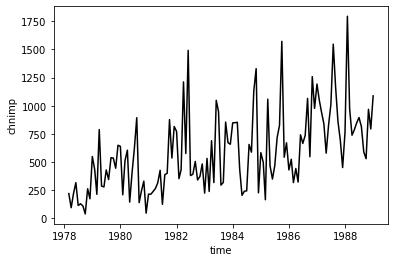

In [26]:
# plot chnimp (default : index on the x-axis)
plt.plot('chnimp',data=barium, color='black',linestyle='-')
plt.ylabel('chnimp')
plt.xlabel('time')
plt.show()

In [27]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [28]:
# download data for 'F' (= Ford Motor Company) and define start and end :
tickers = ['F']
start_date = '2014-01-01'
end_date = '2015-12-31'

In [30]:
# use pandas_Datareader for the import :
F_data = pdr.data.DataReader(tickers, 'yahoo', start_date, end_date)

In [31]:
# look at imported data :
print(f'F_data.head() : \n{F_data.head()}\n')
print(f'F_data.tail() : \n{F_data.tail()}\n')

F_data.head() : 
Attributes  Adj Close  Close   High    Low   Open      Volume
Symbols             F      F      F      F      F           F
Date                                                         
2013-12-31  10.755988  15.43  15.43  15.26  15.29  27829000.0
2014-01-02  10.762959  15.44  15.45  15.28  15.42  31528500.0
2014-01-03  10.811757  15.51  15.64  15.30  15.52  46122300.0
2014-01-06  10.860552  15.58  15.76  15.52  15.72  42657600.0
2014-01-07  10.721134  15.38  15.74  15.35  15.73  54476300.0

F_data.tail() : 
Attributes  Adj Close  Close   High    Low   Open      Volume
Symbols             F      F      F      F      F           F
Date                                                         
2015-12-24  10.715697  14.31  14.37  14.25  14.35   9000100.0
2015-12-28  10.618348  14.18  14.34  14.16  14.28  13697500.0
2015-12-29  10.655790  14.23  14.30  14.15  14.28  18867800.0
2015-12-30  10.610862  14.17  14.26  14.12  14.23  13800300.0
2015-12-31  10.550956  14.09  14.16

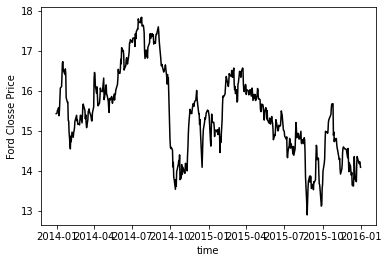

In [32]:
# time series plot of adjusted closing prices :
plt.plot('Close', data=F_data, color='black', linestyle='-')
plt.ylabel('Ford Closse Price')
plt.xlabel('time')
plt.show()

## 10.3 Other Time Series Models

### 10.3.1 Finite Distributed Lag Models

- gfr : general ferility rate
- pe : personal tax exemption
- ww2 : second world war
- pill : availabilty of the birth control pill
- a = 5%, f-test -> pvalue=0.012

In [34]:
fertil3 = woo.dataWoo('fertil3')
T = len(fertil3)
fertil3

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.000000,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.000000,1914,2,4,0.000000,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.000000,1915,3,9,0.000000,0.000000,NaN,NaN,0,...,0.000000,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.000000,1916,4,16,0.000000,0.000000,0.000000,NaN,0,...,0.000000,0.000000,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.270000,1917,5,25,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68.400002,123.169998,1980,68,4624,132.929993,118.980003,116.110001,120.080002,1,...,13.949989,2.870003,-3.970001,-2.279999,67.199997,1.699997,-1.300003,1.000000,-0.199997,65.500000
68,67.400002,119.309998,1981,69,4761,123.169998,132.929993,118.980003,116.110001,1,...,-9.759995,13.949989,2.870003,-3.970001,68.400002,1.200005,1.699997,-1.300003,1.000000,67.199997
69,67.300003,102.040001,1982,70,4900,119.309998,123.169998,132.929993,118.980003,1,...,-3.860001,-9.759995,13.949989,2.870003,67.400002,-1.000000,1.200005,1.699997,-1.300003,68.400002
70,65.800003,92.489998,1983,71,5041,102.040001,119.309998,123.169998,132.929993,1,...,-17.269997,-3.860001,-9.759995,13.949989,67.300003,-0.099998,-1.000000,1.200005,1.699997,67.400002


In [35]:
# define time series - yearly(1913~)
fertil3.index = pd.date_range(start='1913',periods=T,freq='Y').year

In [36]:
# add all lags of 'pe' up to order 2 :
fertil3['pe_lag1'] = fertil3['pe'].shift(1)
fertil3['pe_lag2'] = fertil3['pe'].shift(2)

In [37]:
# linear regresssion or model with lags :
reg = smf.ols(formula='gfr ~ pe + pe_lag1 + pe_lag2 + ww2 + pill', data=fertil3)
results = reg.fit()

In [38]:
# print regression table :
table = pd.DataFrame({'b' : round(results.params, 4),
                      'se' : round(results.bse, 4),
                      't' : round(results.tvalues, 4),
                      'pval' : round(results.pvalues, 4)})
print(f'table1 : \n{table}\n')

table1 : 
                 b       se        t    pval
Intercept  95.8705   3.2820  29.2114  0.0000
pe          0.0727   0.1255   0.5789  0.5647
pe_lag1    -0.0058   0.1557  -0.0371  0.9705
pe_lag2     0.0338   0.1263   0.2679  0.7896
ww2       -22.1265  10.7320  -2.0617  0.0433
pill      -31.3050   3.9816  -7.8625  0.0000



In [45]:
# F- test (H0 : all pe codfficients are= 0)
hypotheses1 = ['pe = 0', 'pe_lag1 = 0', 'pe_lag2 = 0']
ftest1 = results.f_test(hypotheses1)
fstat1 = ftest1.statistic
fpval1 = ftest1.pvalue

print(f'fstat1 : {fstat1}\n')
print(f'fpval1 : {fpval1}\n')

fstat1 : 3.972964046978402

fpval1 : 0.011652005303128304



In [46]:
# calculating the LRP :
b = results.params
b_pe_tot = b['pe'] + b['pe_lag1'] + b['pe_lag2']
print(f'b_pe_tot : {b_pe_tot}\n')

b_pe_tot : 0.10071909027975444



In [49]:
# F test (H0: LRP=0) :
hypotheses2 = ['pe + pe_lag1 + pe_lag2= 0']
ftest2 = results.f_test(hypotheses2)
fstat2 = ftest2.statistic
fpval2 = ftest2.pvalue

print(f'fstat2 : {fstat2}\n')
print(f'fpval2 : {fpval2}\n')

fstat2 : 11.421238467853291

fpval2 : 0.0012408438602972752



## 10.3.2 Trends
### 10.7 Housing Investment and Prices

- invpc : housing investments
- price : housing prices

In [52]:
import numpy as np

In [50]:
hseinv = woo.dataWoo('hseinv')

In [53]:
# linear regression without time trend :
reg_wot = smf.ols(formula='np.log(invpc) ~ np.log(price)', data=hseinv)
results_wot = reg_wot.fit()

In [54]:
# print regression table :
table_wot = pd.DataFrame({'b' : round(results_wot.params, 4),
                      'se' : round(results_wot.bse, 4),
                      't' : round(results_wot.tvalues, 4),
                      'pval' : round(results_wot.pvalues, 4)})
print(f'table_wot : \n{table_wot}\n')

table_wot : 
                    b      se        t    pval
Intercept     -0.5502  0.0430 -12.7882  0.0000
np.log(price)  1.2409  0.3824   3.2450  0.0024



In [56]:
# linear regression with time trend (data set includes a time variable t):
reg_wt = smf.ols(formula= 'np.log(invpc) ~ np.log(price) + t', data=hseinv)
results_wt = reg_wt.fit()

In [57]:
# print regression table :
table_wt = pd.DataFrame({'b' : round(results_wt.params, 4),
                      'se' : round(results_wt.bse, 4),
                      't' : round(results_wt.tvalues, 4),
                      'pval' : round(results_wt.pvalues, 4)})
print(f'table_wt : \n{table_wt}\n')

table_wt : 
                    b      se       t    pval
Intercept     -0.9131  0.1356 -6.7328  0.0000
np.log(price) -0.3810  0.6788 -0.5612  0.5779
t              0.0098  0.0035  2.7984  0.0079



## 10.3.3 Seasonality
### Example 10.11 : Effects of Antidumping Fillings

In [58]:
barium = woo.dataWoo('barium')

In [60]:
# linear regression with seasonal effects :
reg = smf.ols(formula='np.log(chnimp) ~ np.log(chempi) + np.log(gas) + np.log(rtwex) + befile6 + affile6 + afdec6 + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec', data=barium)
results = reg.fit()

In [61]:
# print regression table :
table = pd.DataFrame({'b' : round(results.params, 4),
                      'se' : round(results.bse, 4),
                      't' : round(results.tvalues, 4),
                      'pval' : round(results.pvalues, 4)})
print(f'table : \n{table}\n')

table : 
                      b       se       t    pval
Intercept       16.7792  32.4286  0.5174  0.6059
np.log(chempi)   3.2651   0.4929  6.6238  0.0000
np.log(gas)     -1.2781   1.3890 -0.9202  0.3594
np.log(rtwex)    0.6630   0.4713  1.4068  0.1622
befile6          0.1397   0.2668  0.5236  0.6016
affile6          0.0126   0.2787  0.0453  0.9639
afdec6          -0.5213   0.3019 -1.7264  0.0870
feb             -0.4177   0.3044 -1.3720  0.1728
mar              0.0591   0.2647  0.2231  0.8239
apr             -0.4515   0.2684 -1.6822  0.0953
may              0.0333   0.2692  0.1237  0.9018
jun             -0.2063   0.2693 -0.7663  0.4451
jul              0.0038   0.2788  0.0138  0.9890
aug             -0.1571   0.2780 -0.5650  0.5732
sep             -0.1342   0.2677 -0.5012  0.6172
oct              0.0517   0.2669  0.1937  0.8467
nov             -0.2463   0.2628 -0.9370  0.3508
dec              0.1328   0.2714  0.4894  0.6255

